Connect to Google drive

In [582]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [583]:
import warnings
warnings.filterwarnings('ignore')

Imports

In [584]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")

In [585]:
df = pd.read_csv('/content/drive/MyDrive/Customer-churn-prediction/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [586]:
df.shape

(7043, 21)

In [587]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [588]:
df.drop(columns=['customerID'], inplace=True)

In [589]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [590]:
#check for Null values
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [591]:
df['gender'].value_counts()

,count
gender,
Male,3555
Female,3488


In [592]:
df['SeniorCitizen'].unique()

array([0, 1])

In [593]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [594]:
for col in df.columns:
  if col not in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    print(f'{col} : {df[col].unique()}')
    print('-'*50)

gender : ['Female' 'Male']
--------------------------------------------------
SeniorCitizen : [0 1]
--------------------------------------------------
Partner : ['Yes' 'No']
--------------------------------------------------
Dependents : ['No' 'Yes']
--------------------------------------------------
PhoneService : ['No' 'Yes']
--------------------------------------------------
MultipleLines : ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService : ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity : ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup : ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection : ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport : ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV : [

In [595]:
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
  print(col, len(df[df[col]==' ']))
  print('------------------------')

tenure 0
------------------------
MonthlyCharges 0
------------------------
TotalCharges 11
------------------------


In [596]:
df['TotalCharges'] = df['TotalCharges'].replace({' ' : "0.0"}).astype(float)

In [597]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [598]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


### Exploratory Data Analysis (EDA)

In [599]:
df.shape

(7043, 20)

In [600]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [601]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [602]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
from google.colab import files

In [603]:
round(pd.DataFrame(df['Churn'].value_counts()/df['Churn'].value_counts().sum())*100, 1)

,count
Churn,
No,73.5
Yes,26.5


In [604]:
type_ = ["No", "yes"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['Churn'].value_counts(), name="Churn"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Churn', x=0.5, y=0.5, font_size=20, showarrow=False)])

fig.show()


In [605]:
def plot_dist(df, col_name):
  plt.figure(figsize=(8, 4))

  # KDE plot by Churn
  sns.kdeplot(data=df, x=col_name, hue='Churn', fill=False, common_norm=False, alpha=0.4)
  plt.title(f'Distribution of {col_name} by Churn', fontsize=16)
  plt.xlabel(col_name, fontsize=12)
  plt.ylabel('Density', fontsize=12)

  plt.tight_layout()
  plt.savefig(f"{col_name}_by_churn.png", dpi=300)
  plt.show()
  print()

In [606]:
# plot_dist(df, 'MonthlyCharges')

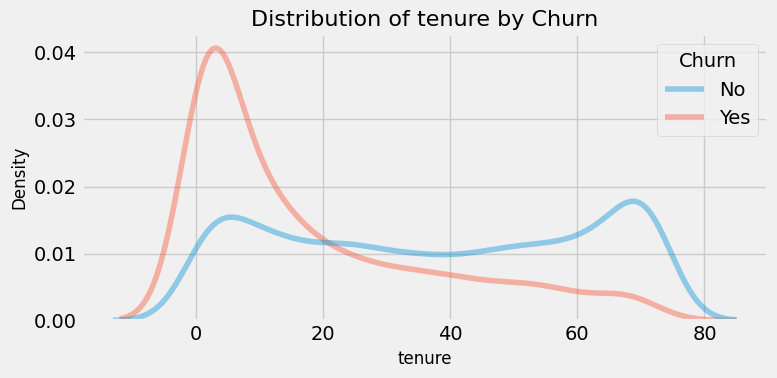

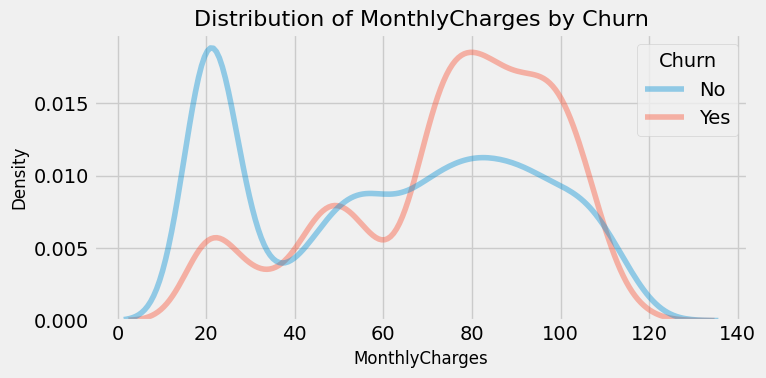

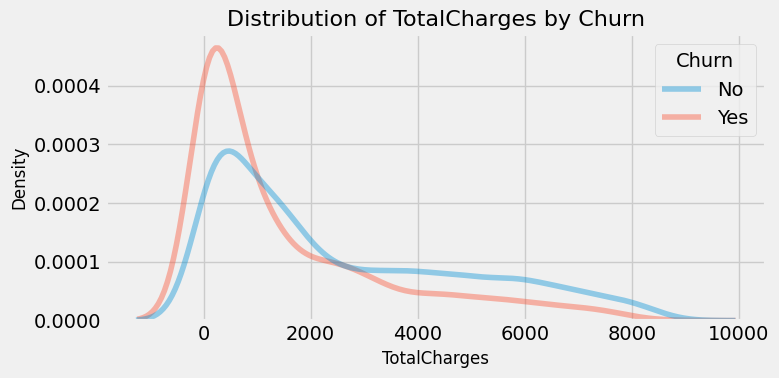

In [607]:
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
  plot_dist(df, col)

Correlation matrix

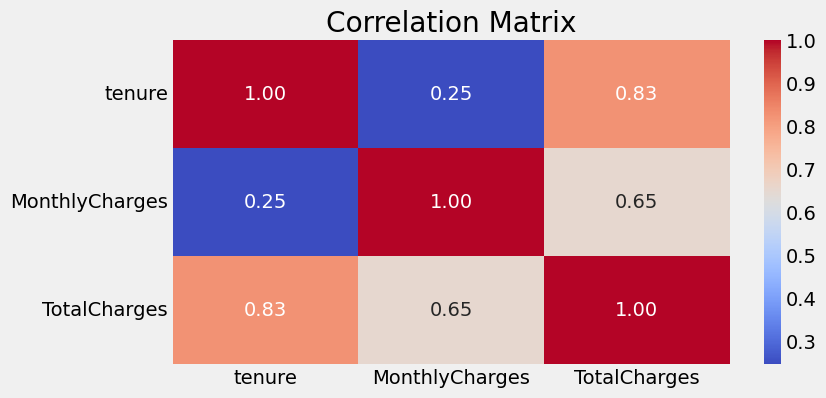

In [608]:
plt.figure(figsize = (8, 4))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

In [609]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

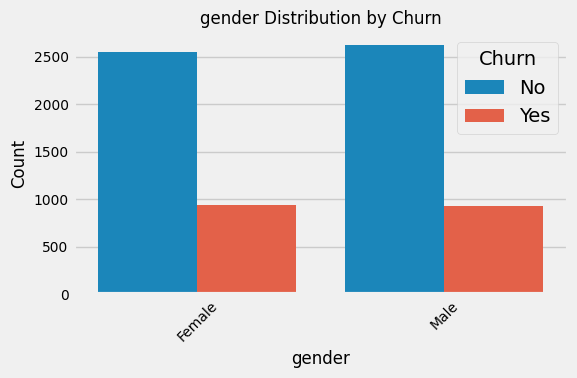

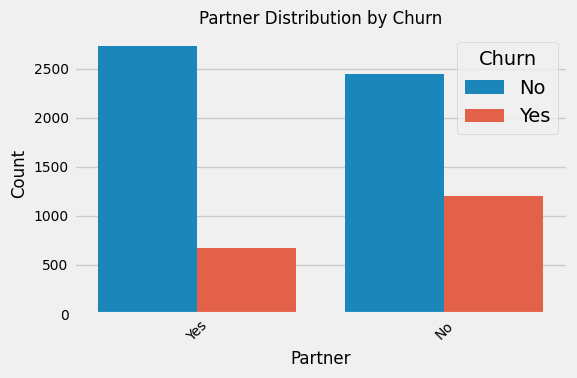

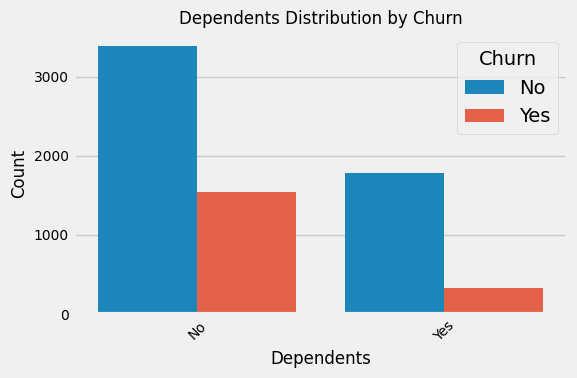

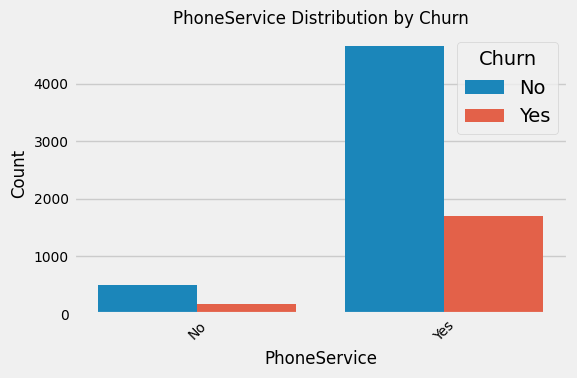

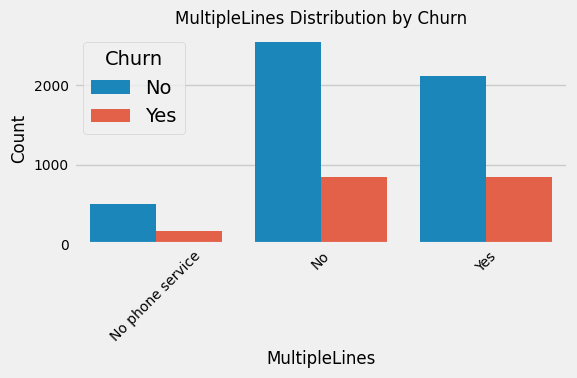

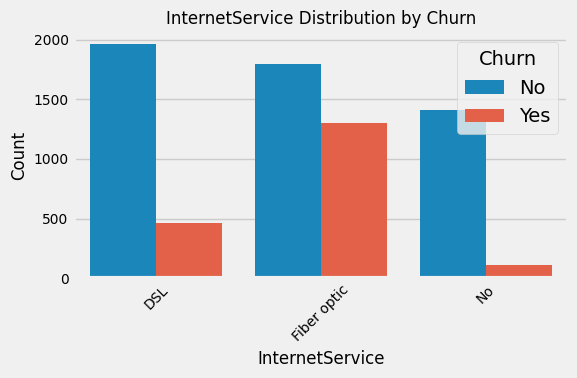

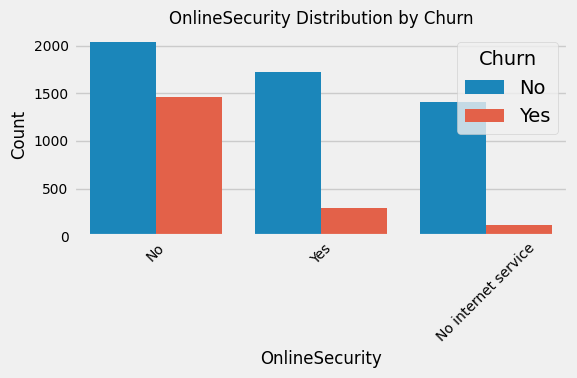

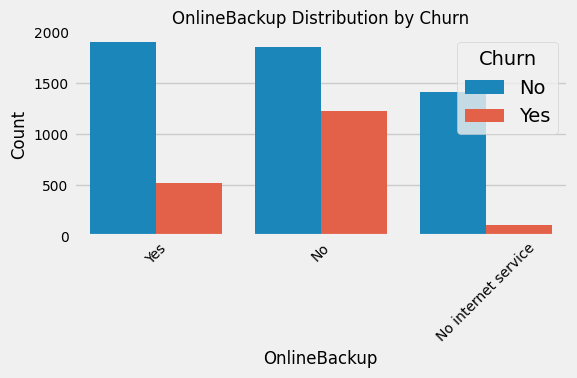

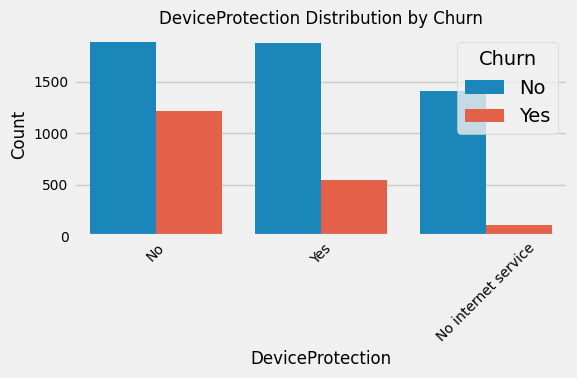

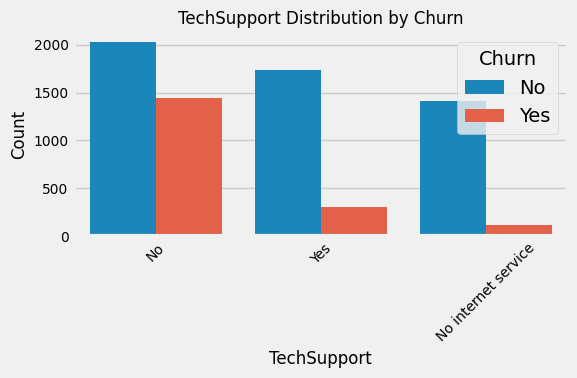

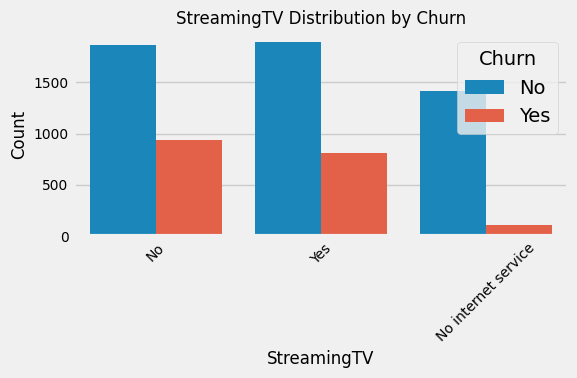

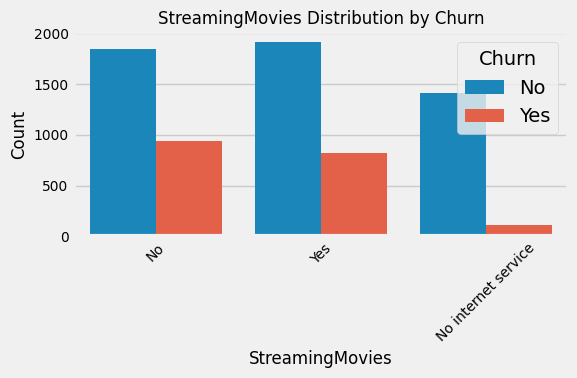

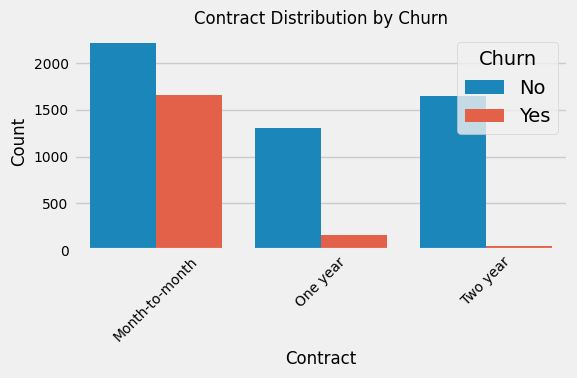

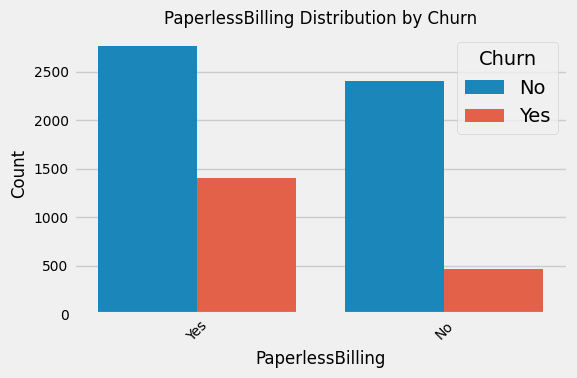

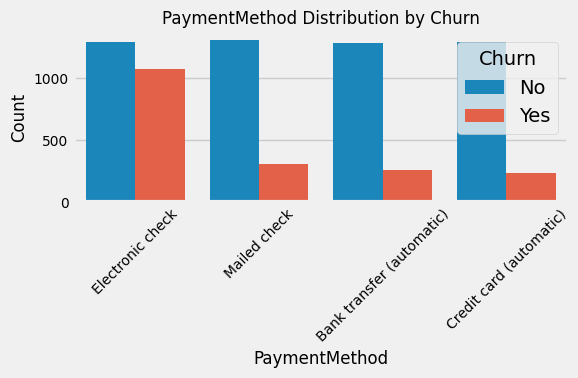

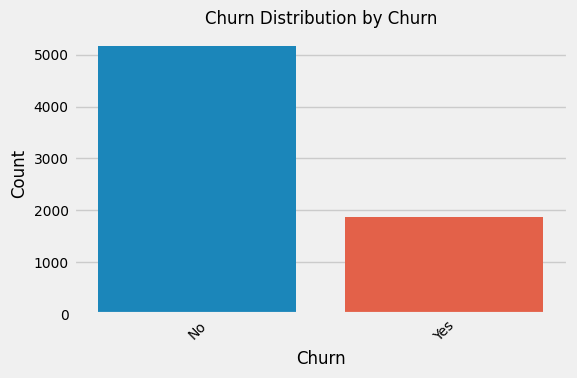

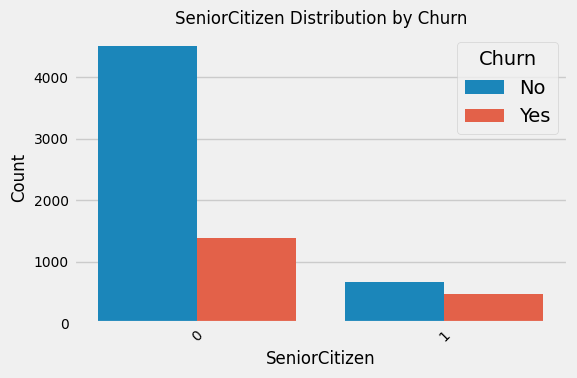

In [610]:
categorical_cols = df.select_dtypes(include='object').columns.to_list() + ['SeniorCitizen']

for col in categorical_cols:
  # print(col)
  plt.figure(figsize=(6, 4))

  sns.countplot(data =df, x = col, hue='Churn')
  plt.title(f'{col} Distribution by Churn', fontsize=12)
  plt.xticks(rotation=45)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)


  plt.xlabel(col, fontsize=12)
  plt.ylabel('Count', fontsize=12)
  plt.tight_layout()

  plt.savefig(f"{col}_distribution_plot.png", dpi=300)
  plt.show()
  print()

In [611]:
# df['Contract'].value_counts()
# df[df['Contract']=='One year']['Churn'].value_counts()
# df[df['Contract']=='One year']['Churn'].value_counts().sum()
# df[df['Contract']=='One year']['Churn'].value_counts()/df[df['Contract']=='One year']['Churn'].value_counts().sum()

In [612]:
# import sys

# print("Stopping execution here...")
# sys.exit()

In [613]:
# Label Encoding on 'Target' column
df['Churn'] = df['Churn'].replace({"Yes": 1, "No": 0})

In [614]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [615]:
#Label Encoding on Categorical columns
object_columns = df.select_dtypes(include='object').columns
object_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [616]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in object_columns:
  label_encoder = LabelEncoder()
  df[col] = label_encoder.fit_transform(df[col])
  encoders[col] = label_encoder

In [617]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [618]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


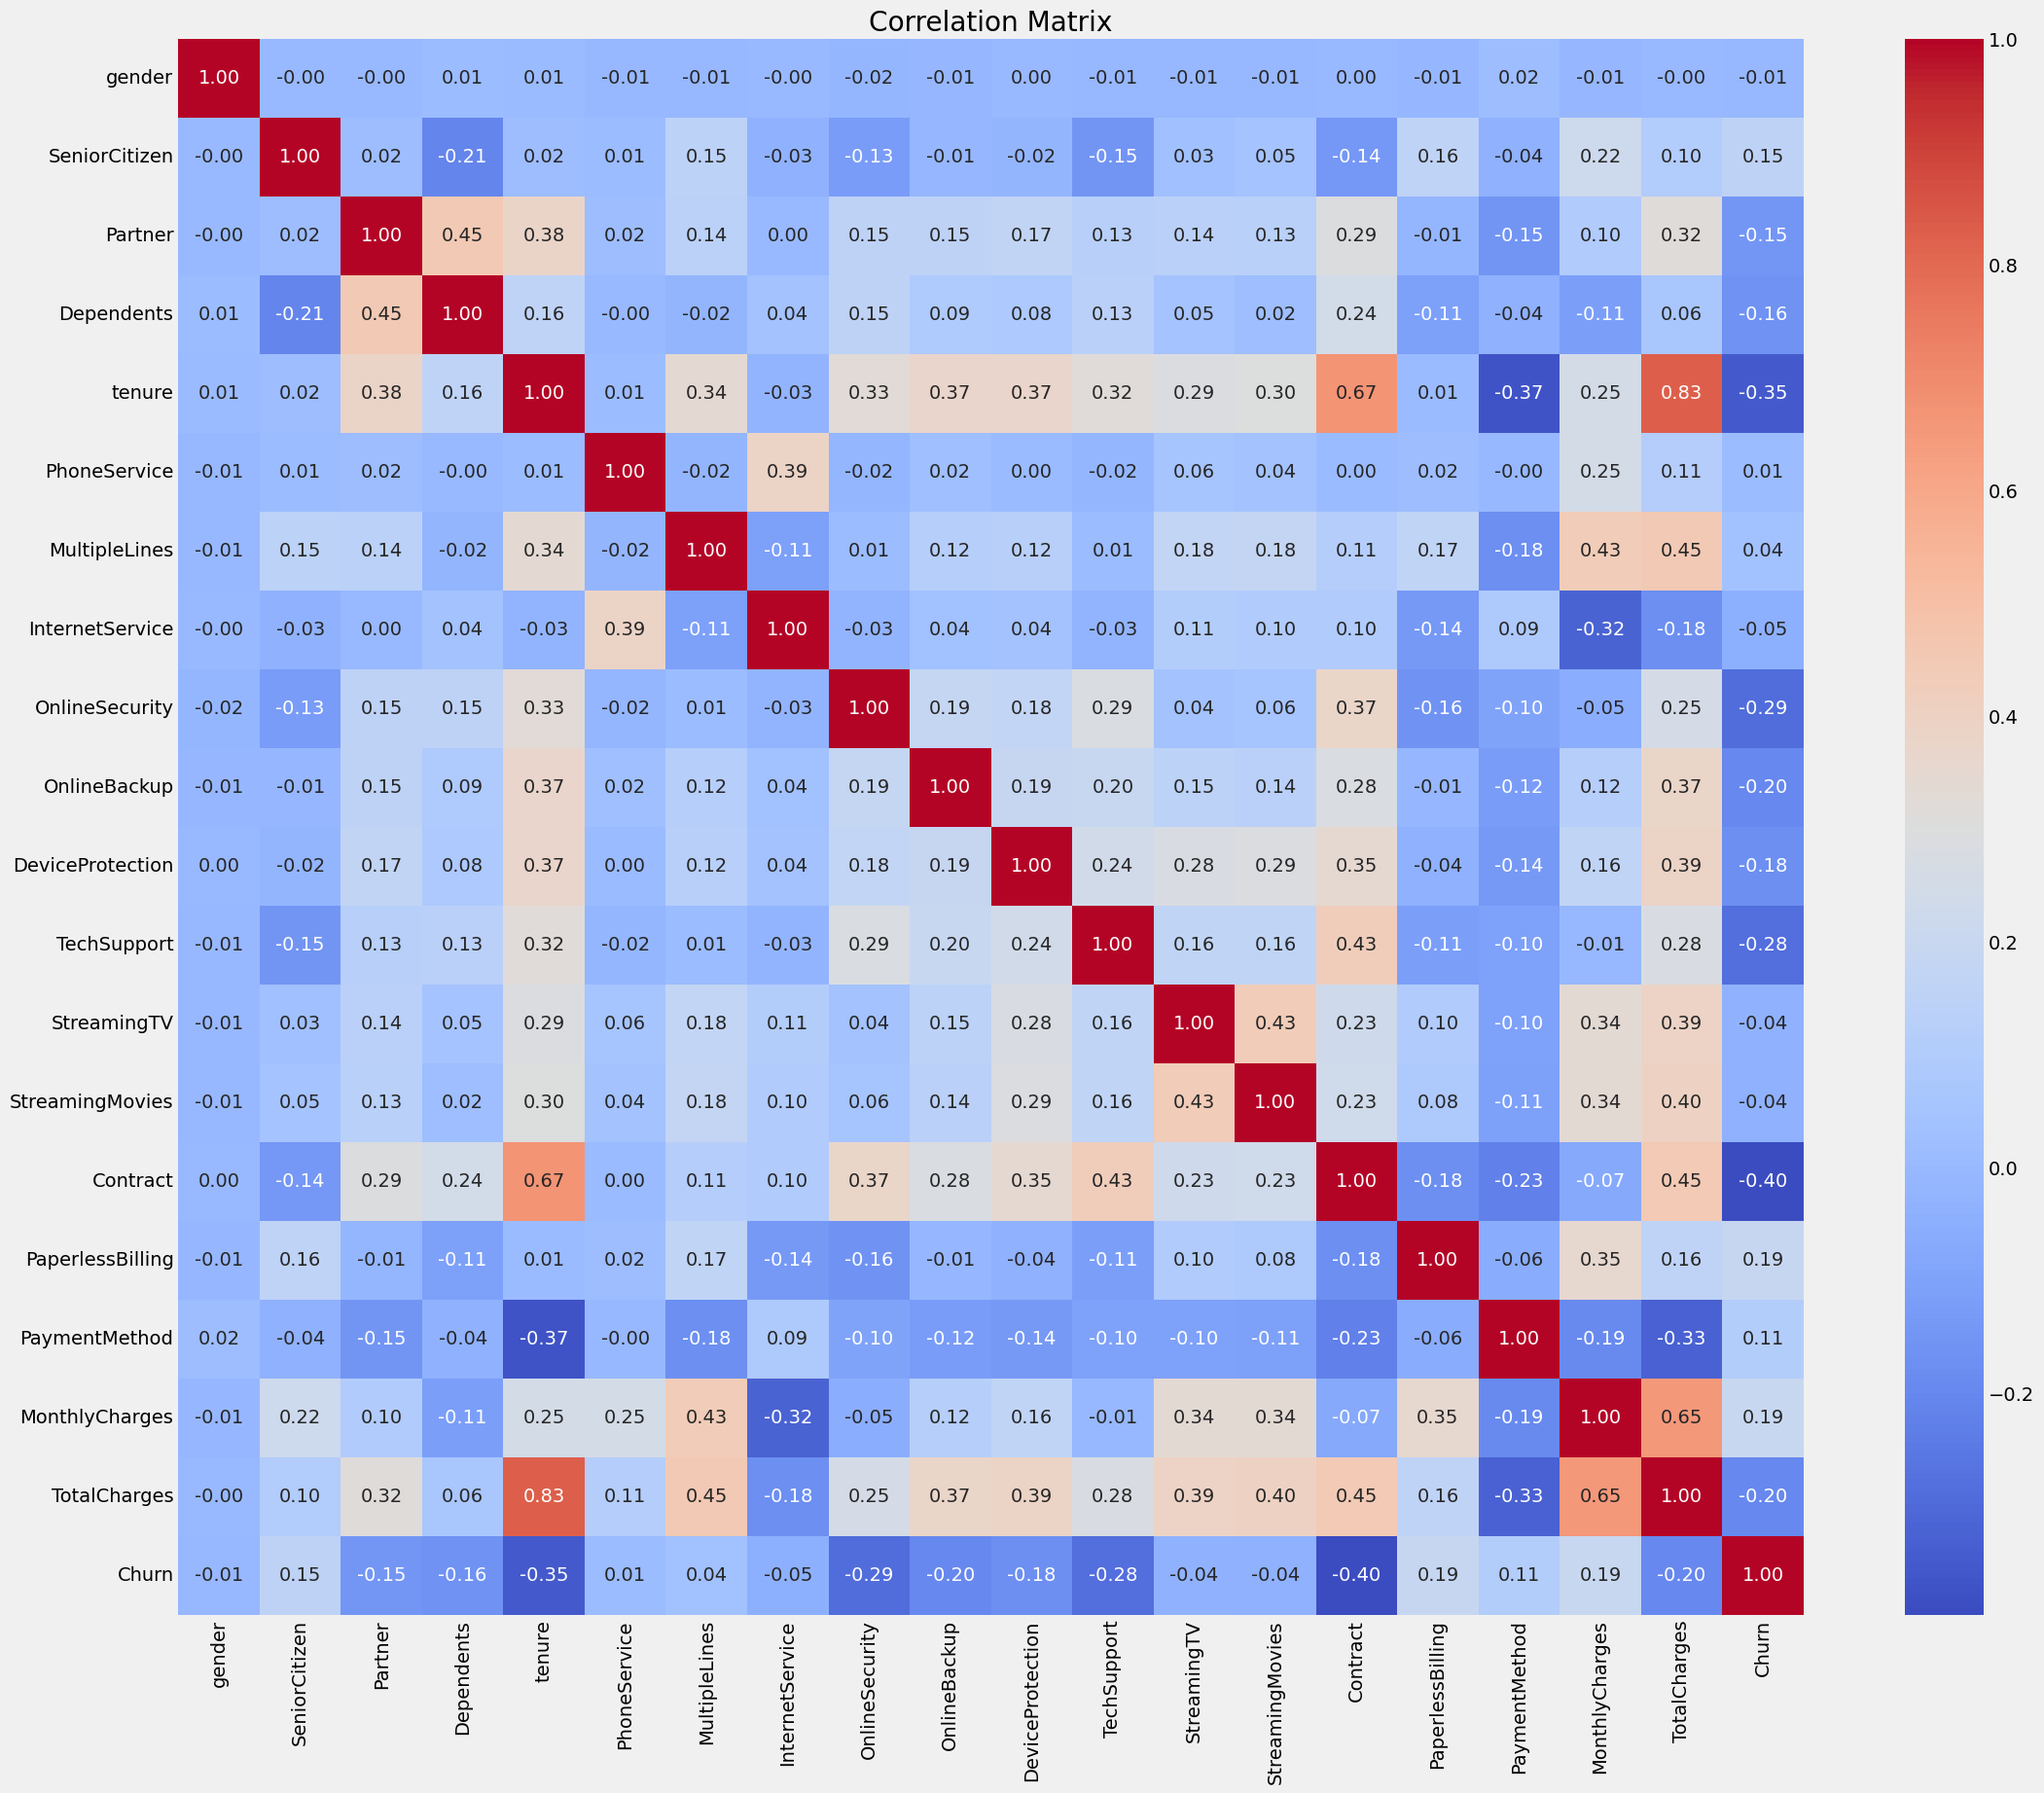

In [619]:
corr_matrix = df.corr()

plt.figure(figsize=(len(corr_matrix.columns) * 1.2, len(corr_matrix.columns)))

sns.heatmap(corr_matrix, annot=True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

In [620]:
import pickle

with open('encoder.pkl', 'wb') as f:
  pickle.dump(encoders, f)

In [621]:
from sklearn.preprocessing import StandardScaler

In [622]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [623]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [624]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


### Applying ML models - `RandomForest`, `XGBoost`

In [625]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [626]:
X = df.drop(columns=['Churn'])
y = df['Churn']

print(X.shape, y.shape)

(7043, 19) (7043,)


In [627]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [628]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5986, 19) (5986,)
(1057, 19) (1057,)


In [629]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,0,0,1,0,-1.277445,0,1,0,0,0,0,0,0,0,0,1,2,-1.328164,-0.994838
2715,1,0,0,0,0.351370,1,2,2,1,1,1,1,1,1,0,1,0,-1.313208,-0.566163
3825,0,0,1,1,0.799294,1,0,2,1,1,1,1,1,1,2,0,3,-1.509300,-0.550611
1807,0,0,0,0,-1.277445,1,0,1,0,0,2,0,0,0,0,0,2,0.385148,-0.972096
132,1,0,0,0,1.410099,1,0,0,0,0,0,2,0,0,2,0,0,-0.472339,0.432521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6641,0,0,0,0,-0.666639,1,0,0,2,0,0,0,0,0,0,1,2,-0.485633,-0.669488
1844,1,0,1,0,1.084337,1,0,0,2,2,2,0,2,0,1,0,1,0.054451,0.740510
2548,1,1,0,0,-0.992402,1,0,1,0,0,0,0,0,0,0,1,1,0.172438,-0.757526
196,1,0,1,1,-0.340876,1,2,2,1,1,1,1,1,1,2,1,0,-1.351430,-0.746629


In [630]:
y_test

,Churn
185,1
2715,0
3825,0
1807,1
132,0
...,...
6641,1
1844,0
2548,0
196,0


In [631]:
smote = SMOTE(random_state=42)

In [632]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [633]:
y_train_smote.value_counts()

,count
Churn,
0,4399
1,4399


In [634]:
print(X_train_smote.shape, y_train_smote.shape)

(8798, 19) (8798,)


In [635]:
# top 2 models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

hyperparameters = {
    "Random Forest" :{
        "n_estimators": [50,100, 200],
        "max_depth": [5, 10, None],
    },
    "XGBoost":{
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7],
    }
}

In [636]:
# models = {
#     'Random Forest': RandomForestClassifier(random_state=42),
#     'XGBoost': XGBClassifier(random_state=42),
#     'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
#     'SVC': SVC(probability=True),
#     'KNN': KNeighborsClassifier(),
#     'MLP': MLPClassifier(max_iter=1000, random_state=42),
#     'Naive Bayes': GaussianNB()
# }

In [637]:
# hyperparameters = {
#     'Random Forest': {
#         'n_estimators': [100, 200],
#         'max_depth': [5, 10, None]
#     },
#     'XGBoost': {
#         'learning_rate': [0.01, 0.1],
#         'max_depth': [3, 5, 7]
#     },
#     'Logistic Regression': {
#         'C': [0.01, 0.1, 1, 10],
#         'penalty': ['l2'],
#         'solver': ['lbfgs']
#     },
#     'SVC': {
#         'C': [0.1, 1, 10],
#         'kernel': ['linear', 'rbf']
#     },
#     'KNN': {
#         'n_neighbors': [3, 5, 7],
#         'weights': ['uniform', 'distance']
#     },
#     'MLP': {
#         'hidden_layer_sizes': [(50,), (100,), (50, 50)],
#         'activation': ['relu', 'tanh'],
#         'alpha': [0.0001, 0.001]
#     },
#     'Naive Bayes': {}  # No hyperparameters to tune
# }


In [638]:
best_models = {}
results = []

for model_name, model in models.items():
  # print(model_name, model)
  print(f'Tuning {model_name}..........')

  if hyperparameters[model_name]:

    grid = GridSearchCV(estimator=model, param_grid=hyperparameters[model_name], cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    grid.fit(X_train_smote, y_train_smote)

    best_model = grid.best_estimator_

    print(f'Best Parameters for {model_name} : {grid.best_estimator_}')
    print(f'Best Accuracy for {model_name} : {grid.best_score_: .2f}\n')

  else:
    model.fit(X_train_smote, y_train_smote) #does not require tuning
    best_model = model
    print(f'{model_name}\n')

  best_models[model_name] = best_model #adding best models to a dict

Tuning Random Forest..........
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters for Random Forest : RandomForestClassifier(n_estimators=200, random_state=42)
Best Accuracy for Random Forest :  0.84

Tuning XGBoost..........
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters for XGBoost : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None

In [639]:
best_models.keys()

dict_keys(['Random Forest', 'XGBoost'])

In [640]:
best_models

{'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.2, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=None,
               n_jobs=None, num_parallel_tree=None, ...)}

In [641]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [642]:
results = []

for model_name, model in best_models.items():
  print(model_name)
  y_pred = best_models[model_name].predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  # storing results
  results.append({
      'Model' : model_name,
      'Test Accuracy' : round(accuracy, 2),
      'Test Precision': round(precision, 2),
      'Test Recall': round(recall, 2),
      'Test F1 Score': round(f1, 2)
  })

Random Forest
XGBoost


In [643]:
pd.DataFrame(results)

,Model,Test Accuracy,Test Precision,Test Recall,Test F1 Score
0,Random Forest,0.77,0.56,0.68,0.62
1,XGBoost,0.78,0.56,0.72,0.63


In [644]:
# import sys

# print("Stopping execution here...")
# sys.exit()

In [645]:
best_models

{'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.2, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=None,
               n_jobs=None, num_parallel_tree=None, ...)}

In [646]:
best_models.keys()

dict_keys(['Random Forest', 'XGBoost'])

### Save Best Model

In [647]:
with open('best_model.pkl', 'wb') as f:
  pickle.dump(best_models['XGBoost'], f)

In [648]:
with open('scaler.pkl', 'wb') as f:
  pickle.dump(scaler, f)

In [649]:
y_pred = best_models['XGBoost'].predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [650]:
y_pred_proba = best_models['XGBoost'].predict_proba(X_test)[:,1]
y_pred_proba

array([0.82119185, 0.39153934, 0.00209359, ..., 0.41185394, 0.03436698,
       0.05692944], dtype=float32)

In [651]:
best_models['XGBoost'].predict_proba(X_test)

array([[0.17880815, 0.82119185],
       [0.60846066, 0.39153934],
       [0.9979064 , 0.00209359],
       ...,
       [0.5881461 , 0.41185394],
       [0.96563303, 0.03436698],
       [0.94307053, 0.05692944]], dtype=float32)

In [652]:
best_models['XGBoost'].predict_proba(X_test)[0, 1]

np.float32(0.82119185)

In [653]:
print(f"Accuracy : ", accuracy_score(y_test, y_pred))
print(f"ROC - AUC Score : ", roc_auc_score(y_test, y_pred))
print(f"Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print(f"Classification Report : \n", classification_report(y_test, y_pred))

Accuracy :  0.7757805108798487
ROC - AUC Score :  0.7579935941432167
Confusion Matrix : 
 [[617 158]
 [ 79 203]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.80      0.84       775
           1       0.56      0.72      0.63       282

    accuracy                           0.78      1057
   macro avg       0.72      0.76      0.74      1057
weighted avg       0.80      0.78      0.78      1057



In [654]:
# import sys

# print("Stopping execution here...")
# sys.exit()

### Prediction on example_input data {Xq}

In [655]:
with open('best_model.pkl', 'rb') as f:
  loaded_model = pickle.load(f)

with open('encoder.pkl', 'rb') as f:
  encoders = pickle.load(f)

with open('scaler.pkl', 'rb') as f:
  scaled_data = pickle.load(f)

In [656]:
def make_prediction(input_data):
    input_df = pd.DataFrame([input_data])
    for col, encoder in encoders.items():
        input_df[col] = encoder.transform(input_df[col])
    numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
    input_df[numerical_cols] = scaled_data.transform(input_df[numerical_cols])
    prediction = loaded_model.predict(input_df)[0]
    # print(loaded_model.predict(input_df))

    probability = loaded_model.predict_proba(input_df)[0, 1]
    # print(loaded_model.predict_proba(input_df))

    return "Churn" if prediction == 1 else "No Churn", probability

example_input-1

In [657]:
example_input = {
    'gender': 'Male',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'Yes',
    'tenure': 72,
    'PhoneService': 'Yes',
    'MultipleLines': 'Yes',
    'InternetService': 'DSL',
    'OnlineSecurity': 'Yes',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'Yes',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Two year',
    'PaperlessBilling': 'No',
    'PaymentMethod': 'Credit card (automatic)',
    'MonthlyCharges': 64.45,
    'TotalCharges': 4720
}

# no churn

In [658]:
pd.DataFrame([example_input])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,No,No,No,Two year,No,Credit card (automatic),64.45,4720


In [659]:
make_prediction(example_input)

('No Churn', np.float32(0.0034672567))

In [660]:
prediction, prob = make_prediction(example_input)
print(f"Prediction: {prediction}, Probability : {prob : .2f}")

Prediction: No Churn, Probability :  0.00


example_input2

In [661]:
example_input2 = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 28,
    'PhoneService': 'Yes',
    'MultipleLines': 'Yes',
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'No',
    'DeviceProtection': 'Yes',
    'TechSupport': 'Yes',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'Yes',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 104.8,
    'TotalCharges': 3046.05
}

#ground_truth(y_test) = Churn (Yes)

In [662]:
pd.DataFrame([example_input2])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05


In [663]:
make_prediction(example_input2)

('Churn', np.float32(0.92344934))

In [664]:
prediction, prob = make_prediction(example_input2)
print(f"Prediction: {prediction}, Probability : {prob : .2f}")

Prediction: Churn, Probability :  0.92


In [665]:
# Flask Framework web application